# Hello, this is my first notebook, reading the data and manipulating it

In [12]:
# Importing the packages we will need
from __future__ import print_function
from __future__ import division
from IPython.display import display
from ipywidgets import Button, Layout
from ipywidgets import interact, interactive, fixed, interact_manual

import ipywidgets as ipw
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [13]:
# Defining a function plot that plots y against x and creates labels
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

In [14]:
def run_calculation(slope,aspect,albedo,roughness):
    # Input parameters that don't change for the practical
    lat=63.5
    long=-19.5
    ref_long=0.0
    summertime=0.0
    elevation=300.0
    met_stat_elevation=300.0
    lapse_rate=0.0056
    
    # Reading the meteorological data file 
    df = pd.read_excel('Samplmet.xls')
    # What does the file look like? Printing the head of it
    # df.head()
    # Renaming the columns 
    df.columns = ['day', 'time', 'inswrad', 'avp', 'airtemp','windspd']
    
    running_time=df.day + df.time/2400
    temperature=df.airtemp*albedo
    fig, ax = plt.subplots()
    plot(running_time, temperature, ax, 'Time in days', 'Air temperature x albedo')
    
    import xlsxwriter

    # Create a workbook and add a worksheet.
    workbook = xlsxwriter.Workbook('output1.xlsx')
    worksheet = workbook.add_worksheet()

    
    # Start from the first cell. Rows and columns are zero indexed.
    row = 0
    col = 0
    
    worksheet.write(row, col, 'Time')

    row += 1
    # Iterate over the data and write it out row by row.
    for time_entry in (running_time):
        worksheet.write(row, col, time_entry)
        row += 1

    # Write a total using a formula.
    worksheet.write(row, 0, 'Total')
    worksheet.write(row, 1, '=SUM(B1:B4)')

    workbook.close()

In [15]:
# Make user interface
def getvalue(x): 
    return x

w1 = interactive(getvalue, x=ipw.BoundedFloatText(value=7.5,min=0,max=10.0,step=0.1,description='Slope:',disabled=False))
display(w1)

w2 = interactive(getvalue, x=ipw.BoundedFloatText(value=7.5,min=0,max=10.0,step=0.1,description='Aspect:',disabled=False))
display(w2)


w3 = interactive(getvalue, x=ipw.BoundedFloatText(
    value=0.5,
    min=0,
    max=1.0,
    step=0.0001,
    description='Albedo:',
    disabled=False
))
display(w3)

w4 = interactive(getvalue, x=ipw.BoundedFloatText(
    value=0.5,
    min=0,
    max=1.0,
    step=0.0001,
    description='Roughness:',
    disabled=False
))
display(w4)

interactive(children=(BoundedFloatText(value=7.5, description='Slope:', max=10.0, step=0.1), Output()), _dom_c…

interactive(children=(BoundedFloatText(value=7.5, description='Aspect:', max=10.0, step=0.1), Output()), _dom_…

interactive(children=(BoundedFloatText(value=0.5, description='Albedo:', max=1.0, step=0.0001), Output()), _do…

interactive(children=(BoundedFloatText(value=0.5, description='Roughness:', max=1.0, step=0.0001), Output()), …

Button(description='Load these values and run the model!', style=ButtonStyle())

Output()

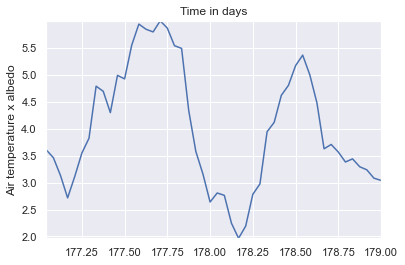

In [16]:
# Loading the input parameters defined by the user
from IPython.display import display
button = ipw.Button(description="Load these values and run the model!")
output = ipw.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        print("Loading values and running the model.")
        slope=w1.result
        aspect=w2.result
        albedo=w3.result
        roughness=w4.result
        print('The slope is %.1f, the aspect is %.1f, the albedo is %.4f, and the roughness is %.4f.' % (slope,aspect,albedo,roughness))
        run_calculation(slope,aspect,albedo,roughness)
button.on_click(on_button_clicked)